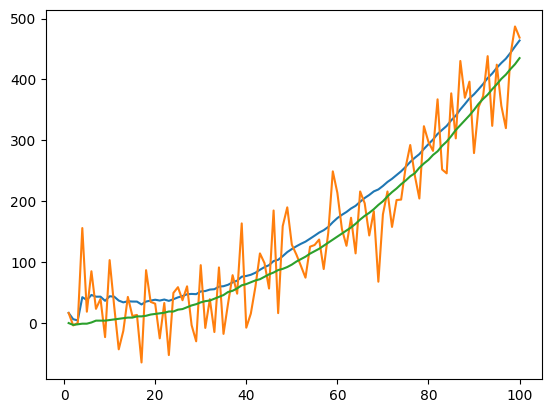

In [25]:
import numpy as np
import matplotlib.pyplot as plt

N=100  # number of samples
a=0.1 # acceleration
sigmaPsi=1
sigmaEta=50
k=np.arange(1, N+1)
x=k.copy()
x[0]=0
z=[x[0]+np.random.normal(0,sigmaEta)]
for t in range(N-1):
    x[t+1]=x[t]+a*t+np.random.normal(0,sigmaPsi)
    z.append(x[t+1]+np.random.normal(0,sigmaEta))
#kalman filter
xOpt=[z[0]]
eOpt=[sigmaEta] # eOpt(t) is a square root of the error dispersion (variance). It's not a random variable.
K= np.zeros(N)
for t in range(N-1):
    eOpt.append(np.sqrt((sigmaEta**2)*(eOpt[t]**2+sigmaPsi**2)/(sigmaEta**2+eOpt[t]**2+sigmaPsi**2)))
    K[t+1]=(eOpt[t+1])**2/sigmaEta**2
    xOpt.append((xOpt[t]+a*t)*(1-K[t+1])+K[t+1]*z[t+1])
xOpt = np.array(xOpt)
z = np.array(z)
x = np.array(x)

plt.plot(k, xOpt)
plt.plot(k, z)
plt.plot(k, x)
plt.show()


In [2]:
import numpy as np

# Задаем начальное состояние системы
x = np.array([-7, -4, 25, 5.5, 1.28*9.81, 0]) # [r_x, r_y, r_z, v_x, v_y, v_z]

# Определяем ковариационную матрицу ошибок оценки состояния
P = np.eye(6) # единичная матрица размера 6x6

# Определяем матрицу перехода состояний
dt = 1.0/25 # интервал времени dt
F = np.array([[1, 0, 0, dt, 0, 0],
              [0, 1, 0, 0, dt, 0],
              [0, 0, 1, 0, 0, dt],
              [0, 0, 0, 1, 0, 0],
              [0, 0, 0, 0, 1, 0],
              [0, 0, 0, 0, 0, 1]])

# Определяем матрицу измерений
H = np.array([[1, 0, 0, 0, 0, 0],
              [0, 1, 0, 0, 0, 0],
              [0, 0, 1, 0, 0, 0]])

# Определяем матрицу ковариации ошибки измерения
err_x = err_y = err_z = 1 # стандартное отклонение для каждой координаты
R = np.diag([err_x**2, err_y**2, err_z**2]) # диагональная матрица размера 3x3

# Определяем матрицу управления, если у вас есть входное у

In [4]:
import numpy as np

def ekf(x, P, F, H, R, measurements, u=None):
    # x - начальное состояние системы
    # P - начальная матрица ковариации
    # F - матрица перехода состояний
    # H - матрица измерений
    # R - матрица ковариации ошибки измерения
    # measurements - массив измерений
    # u - матрица управления, если есть

    # Размеры системы
    dim_x = x.shape[0]
    dim_z = measurements.shape[1]

    # Выходные данные
    states = np.zeros((len(measurements), dim_x))
    covariances = np.zeros((len(measurements), dim_x, dim_x))

    for i, z in enumerate(measurements):
        # Step 1: Predict
        if u is not None:
            B = np.array([[dt**2/2, 0, 0],
                        [0, dt**2/2, 0],
                        [0, 0, dt**2/2],
                        [dt, 0, 0],
                        [0, dt, 0],
                        [0, 0, dt]])
            x = np.dot(F, x) + np.dot(B, u)
        else:
            x = np.dot(F, x)

        # Линеаризация модели движения системы
        J = np.array([[1, 0, 0, dt, 0, 0],
                    [0, 1, 0, 0, dt, 0],
                    [0, 0, 1, 0, 0, dt],
                    [0, 0, 0, 1, 0, 0],
                    [0, 0, 0, 0, 1, 0],
                    [0, 0, 0, 0, 0, 1]])
        P = np.dot(J, np.dot(P, J.T))
        
        # Step 2: Update
        y = z - np.dot(H, x)
        S = np.dot(H, np.dot(P, H.T)) + R
        K = np.dot(P, np.dot(H.T, np.linalg.inv(S)))
        x = x + np.dot(K, y)
        P = np.dot((np.eye(dim_x) - np.dot(K, H)), P)
        
        # Сохранение состояния и измерений для построения графиков
        states[i] = x
        covariances[i] = P

    return states, covariances


In [6]:
def DeleteTrash(pathTxtFile):
    with open (pathTxtFile, 'r') as f:
        old_data = f.read()
        new_data = old_data.replace('[', '')
        new_data = new_data.replace(']', '')
        new_data = new_data.replace(',', '')
        new_data = new_data.replace(';', '')
        new_data = new_data.replace('(', '')
        new_data = new_data.replace(')', '')
    with open (pathTxtFile, 'w') as f:
        f.write(new_data)

DeleteTrash(r"./BallDetectorLogSobelVectorDotVideo63WithOffset1QMore.txt") 
FindCord = np.loadtxt(r"./BallDetectorLogSobelVectorDotVideo63WithOffset1QMore.txt")


In [ ]:

measurements = FindCord
resState, covariancesMat = ekf(x, P, F, H , R, measurements)

In [7]:
resState

array([[-3.40264417e+00, -1.76132669e+00,  1.25542573e+01,
        -3.36895463e-01, -1.74388781e-01,  1.24299577e+00],
       [-4.50435339e+00, -2.20909154e+00,  1.68965740e+01,
        -6.42043941e-01, -2.97339059e-01,  2.44814353e+00],
       [-5.05087067e+00, -2.33369241e+00,  1.92853336e+01,
        -8.95892829e-01, -3.47269038e-01,  3.57653576e+00],
       [-5.37076064e+00, -2.31553819e+00,  2.09097521e+01,
        -1.07304720e+00, -3.06591255e-01,  4.55097027e+00],
       [-5.56993092e+00, -2.20849909e+00,  2.21632884e+01,
        -1.16194936e+00, -1.73334911e-01,  5.32365345e+00],
       [-5.68509850e+00, -2.03104968e+00,  2.31915132e+01,
        -1.16081980e+00,  4.08243047e-02,  5.86883930e+00],
       [-5.72928214e+00, -1.79337981e+00,  2.40404184e+01,
        -1.07693841e+00,  3.13342988e-01,  6.17453074e+00],
       [-5.70990770e+00, -1.50430867e+00,  2.47282547e+01,
        -9.26462812e-01,  6.18557662e-01,  6.25787937e+00],
       [-5.63672980e+00, -1.17667215e+00,  2.527